In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Dataset 확인

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
type(df_train)      # DataFrame

pandas.core.frame.DataFrame

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### 1.1 Null data check

In [9]:
for col in df_train.columns:
    msg = 'column: {0:>10}\t Percent of NaN value: {1:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [10]:
for col in df_test.columns:
    msg = 'column: {0:>10}\t Percent of NaN vlaue: {1:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN vlaue: 0.00%
column:     Pclass	 Percent of NaN vlaue: 0.00%
column:       Name	 Percent of NaN vlaue: 0.00%
column:        Sex	 Percent of NaN vlaue: 0.00%
column:        Age	 Percent of NaN vlaue: 20.57%
column:      SibSp	 Percent of NaN vlaue: 0.00%
column:      Parch	 Percent of NaN vlaue: 0.00%
column:     Ticket	 Percent of NaN vlaue: 0.00%
column:       Fare	 Percent of NaN vlaue: 0.24%
column:      Cabin	 Percent of NaN vlaue: 78.23%
column:   Embarked	 Percent of NaN vlaue: 0.00%


- train, test set에서 Age(둘 다 약20%), Cabin(둘 다 약 80%), Embarked(train만 약 0.22%)변수에 null data가 존재한다.  
  
  
- msno라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 확인가능하다.

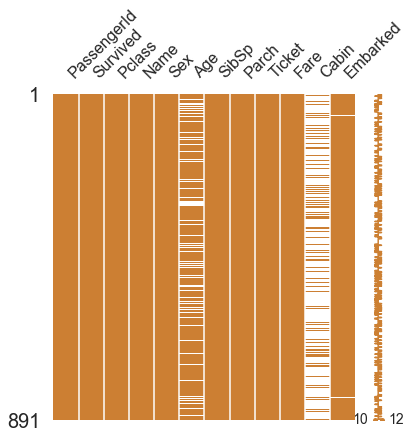

In [11]:
msno.matrix(df=df_train, figsize=(6,6), color=(0.8,0.5,0.2))

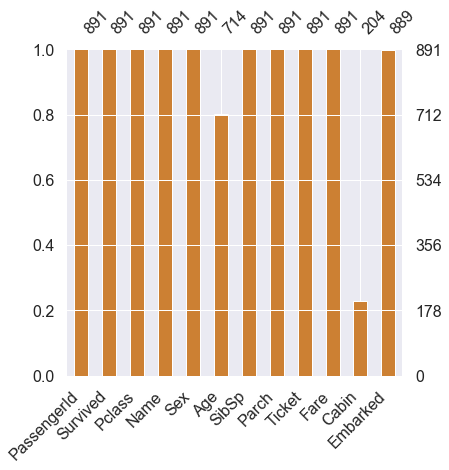

In [12]:
msno.bar(df=df_train.iloc[:,:], figsize=(6,6), color=(0.8,0.5,0.2))

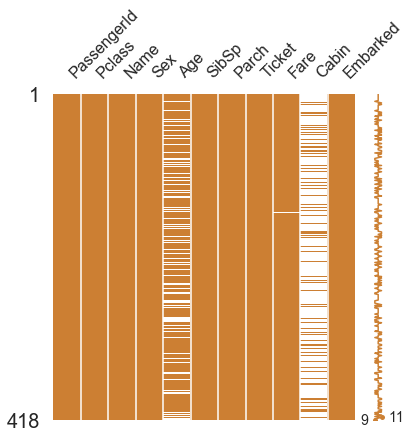

In [13]:
msno.matrix(df=df_test, figsize=(6,6),color=(0.8,0.5,0.2))

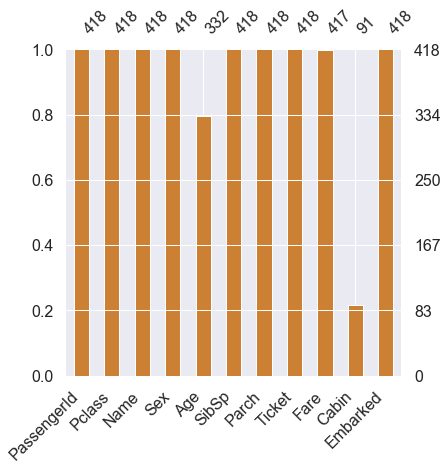

In [14]:
msno.bar(df=df_test, figsize=(6,6),color=(0.8,0.5,0.2))

### 1.2 Target label 확인
- binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있다.  
아래의 문법은 matplotlib의 pyplot 그리는 법  
plt.subplot()은 팔레트를 만드는 과정, 1,2: 1행 2열, 가로로 18, 세로로 8인 크기  
ax는 어느 팔레트에 있을 것인가

Text(0.5, 1.0, 'Count plot - Survived')

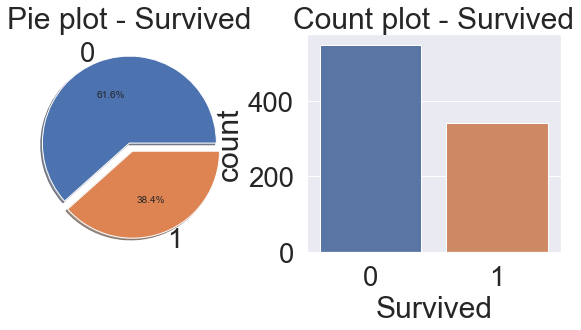

In [15]:
f, ax = plt.subplots(1, 2, figsize = (10,4))         

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')


In [16]:
df_train['Survived'].count()          # 전체 카운트

891

In [17]:
df_train['Survived'].value_counts()     # 각 레이블 카운트

0    549
1    342
Name: Survived, dtype: int64

pandas는 항상 시리즈로 데이터 반환 --> 시리즈는 항상 plot을 가지고 있다

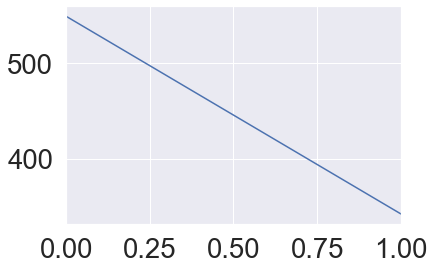

In [18]:
df_train['Survived'].value_counts().plot()   

타겟 데이터 결론
- 38.4%가 살아남았다.  
- target label의 분포가 제법 균일(balanced)하다.
- 예를 들어 만약 100중 1이 99로 불균일한 경우(imbalanced) 만약 모델이 모두 Survived == 1 로 예측해도 정확도가 99%가 나온다. 0을 찾는 문제라면 이 모델은 쓸모 없는 모델이 된다.

## 2. Exploratory data analysis

### 2.1 Pclass
- Pclass는 ordinal, 서수형 데이터. 카테고리이면서 순서가 있는 데이터
- 먼저 Pclass에 따른 생존률의 차이를 살펴보기로 하자.

In [19]:
df_train[['Pclass','Survived']].groupby('Pclass', as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [20]:
df_train[['Pclass','Survived']].groupby('Pclass',as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [21]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [22]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='ocean')  # color map scheme

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [23]:
df_train[['Pclass','Survived']].groupby('Pclass', as_index=True).mean()   # 생존률이 된다.

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


sort_values()로 정렬도 가능하다.

In [24]:
df_train[['Pclass','Survived']].groupby('Pclass', as_index=True).mean().sort_values(by='Survived')

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [25]:
df_train[['Pclass','Survived']].groupby('Pclass', as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


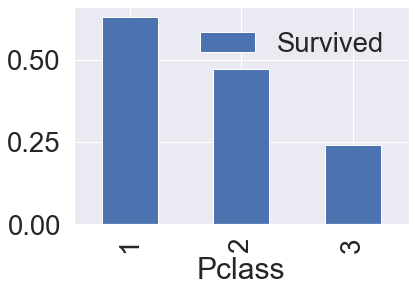

In [26]:
df_train[['Pclass','Survived']].groupby('Pclass', as_index=True).mean().plot.bar()

- Pclass가 높을수록 생존률이 높은 것을 확인할 수 있다.

- seaborn의 countplot을 이용하면, 특정 label에 따른 개수를 확인할 수 있다.  
hue 인자는 그룹별로 나눠주는 역할을 한다.

Text(0.5, 1.02, 'Pclass: Survived vs Dead')

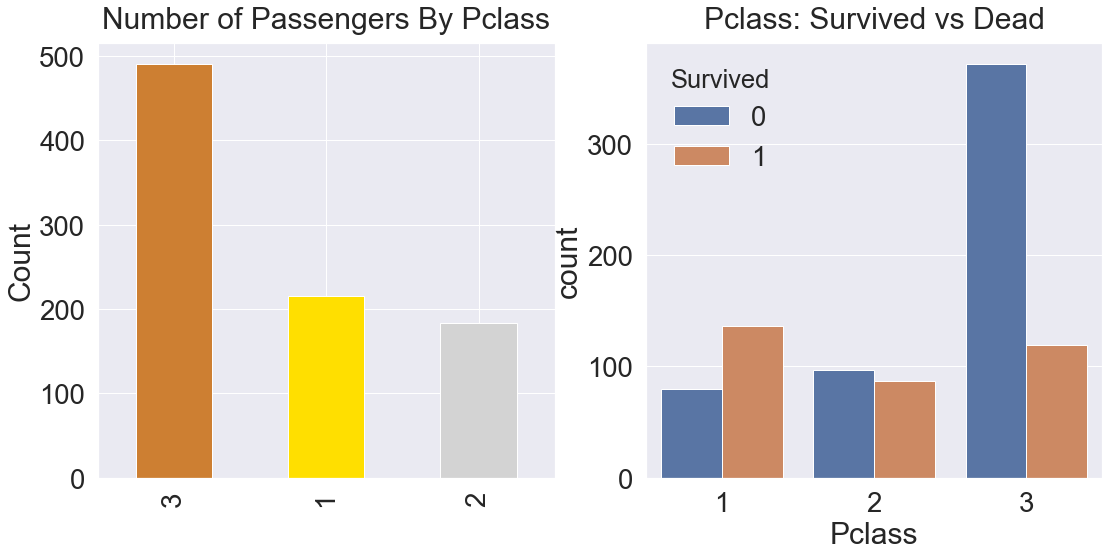

In [27]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', data=df_train, hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

Pclass 결론
- Pclass가 높을수록, 생존 확률이 높은 걸 확인할 수 있다.
- 우리는 생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며, 후에 모델을 구축할 때 이 feature를 사용하는 것이 좋을 것이라 판단 가능하다.

### 2.2 Sex

- 이번에는 성별로 생존률이 어떻게 달라지는 지 확인한다.
- 마찬가지로 pandas의 groupby와 seaborn의 countplot을 사용해 시각화한다.

In [28]:
df_train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [29]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='winter')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Text(0.5, 1.0, 'Sex: Survived vs Dead')

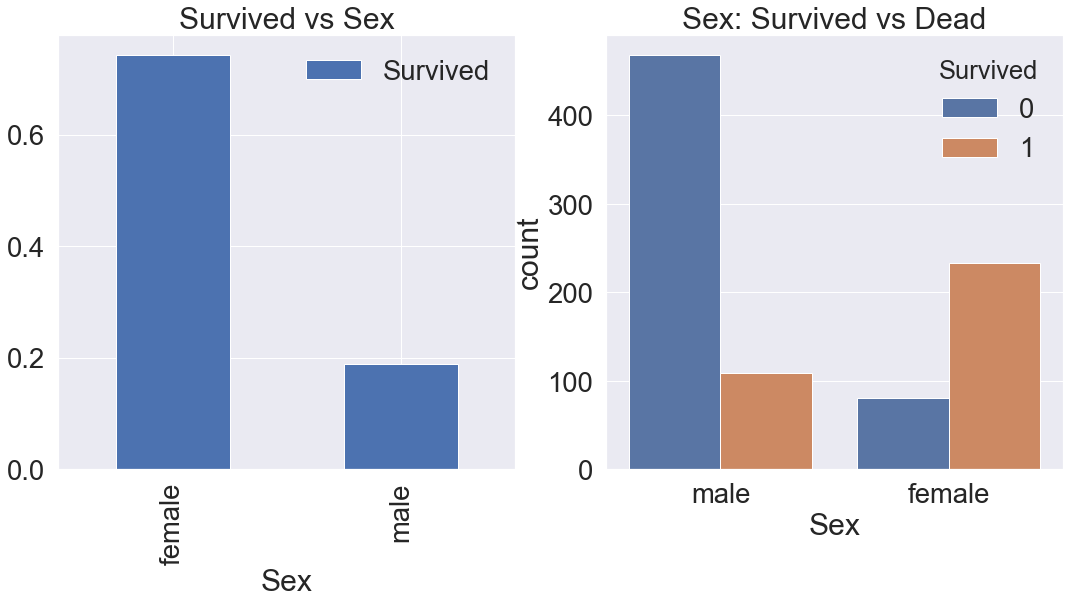

In [30]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex','Survived']].groupby('Sex',as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', data=df_train, hue='Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

Sex 결론
- 여자가 생존할 확률이 더 높다
- Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 feature이다

### 2.3 Both Sex and Pclass
- 이번에는 Sex, Pclass 두 변수에 대해 Survived가 어떻게 달라지는지 확인한다.
- seaborn의 factorplot을 이용하면, 손쉽게 3차원 그래프를 그릴 수 있다.

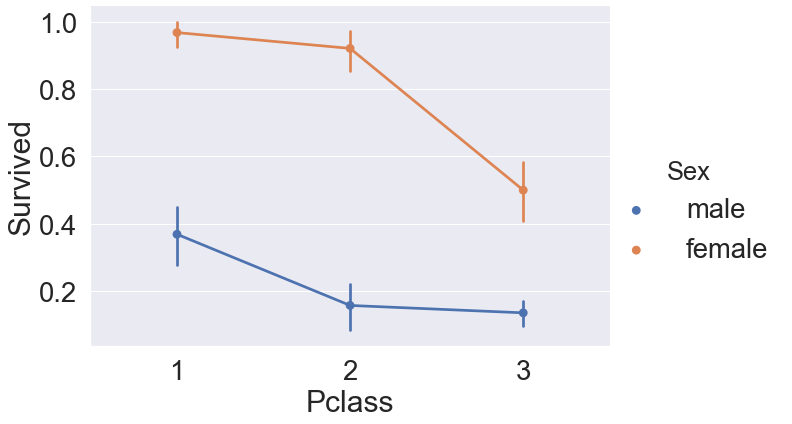

In [31]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train, size=6, aspect=1.5)

- 여자가 더 살 확률이 높다.
- 비싼 좌석일 수록 살 확률이 높다

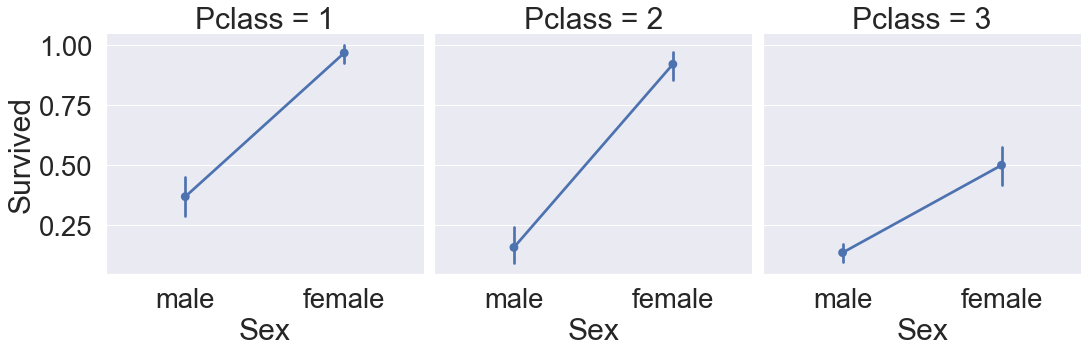

In [32]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train)

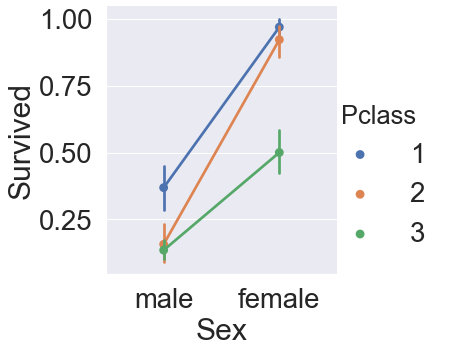

In [33]:
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=df_train)

### 2.4 Age

In [34]:
print('제일 나이 많은 탑승객: {0:.1f} years'.format(df_train['Age'].max()))
print('제일 나이 어린 탑승객: {0:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {0:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 years
제일 나이 어린 탑승객: 0.4 years
탑승객 평균 나이: 29.7 years


- 생존에 따른 Age의 histogram(kdeplot)을 그려본다.

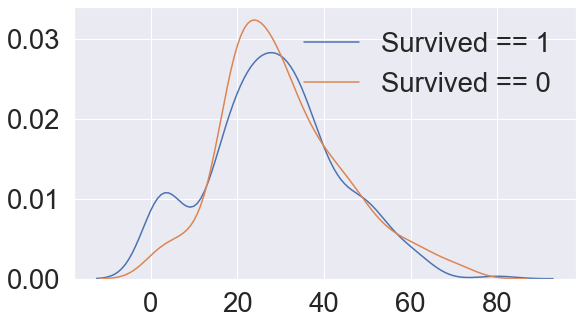

In [35]:
fig, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])

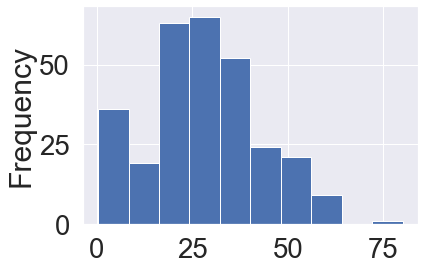

In [36]:
df_train[df_train['Survived']==1]['Age'].plot.hist()

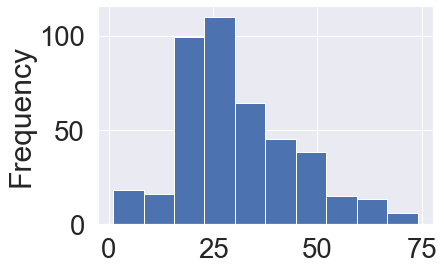

In [37]:
df_train[df_train['Survived']==0]['Age'].plot.hist()

- 생존자 중 나이가 어린 경우가 많음을 알 수 있다.

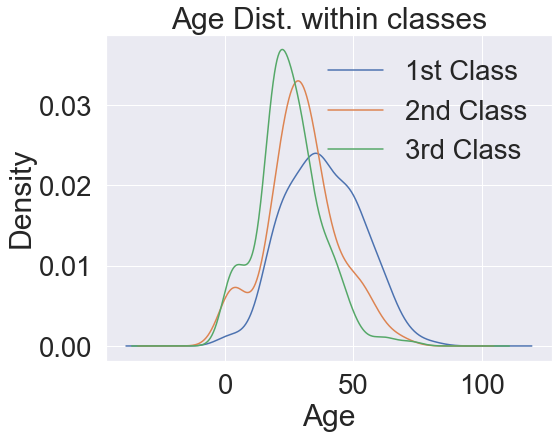

In [38]:
# Age distribution with classes
# matplotlib은 여러 방식의 그리기가 있다.
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Dist. within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

In [39]:
#fig, ax = plt.subplots(1, 1, figsize=(8,6))
#sns.kdeplot(df_train[df_train['Pclass']==1]['Age'])
#sns.kdeplot(df_train[df_train['Pclass']==2]['Age'])
#sns.kdeplot(df_train[df_train['Pclass']==3]['Age'])
#plt.legend(['Pclass == 1', 'Pclass == 2', 'Pclass == 3'])

- Class가 높을수록 나이가 많은 사람의 비중이 커짐

Text(0.5, 1.0, '3rd Class')

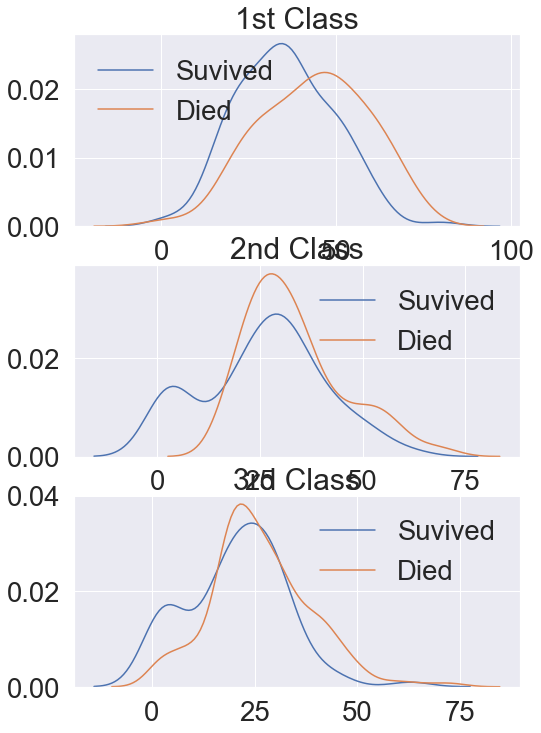

In [40]:
# Class별 나이에 따른 생존여부의 dist
fig, ax = plt.subplots(3, 1, figsize=(8,12))
sns.kdeplot(df_train[(df_train['Pclass']==1) & (df_train['Survived'] == 1)]['Age'], ax=ax[0])
sns.kdeplot(df_train[(df_train['Pclass']==1) & (df_train['Survived'] == 0)]['Age'], ax=ax[0])

sns.kdeplot(df_train[(df_train['Pclass']==2) & (df_train['Survived'] == 1)]['Age'], ax=ax[1])
sns.kdeplot(df_train[(df_train['Pclass']==2) & (df_train['Survived'] == 0)]['Age'], ax=ax[1])

sns.kdeplot(df_train[(df_train['Pclass']==3) & (df_train['Survived'] == 1)]['Age'], ax=ax[2])
sns.kdeplot(df_train[(df_train['Pclass']==3) & (df_train['Survived'] == 0)]['Age'], ax=ax[2])

ax[0].legend(['Suvived','Died'])
ax[1].legend(['Suvived','Died'])
ax[2].legend(['Suvived','Died'])

ax[0].set_title('1st Class')
ax[1].set_title('2nd Class')
ax[2].set_title('3rd Class')



- 나이대가 변하면서 생존률이 어떻게 되는 지 보고자 한다.
- 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 보자.

In [41]:
# i보다 Age가 작을 때 생존률(i = 1,2,3,...,80)
cummulative_survive_ratio = []
for i in range(1,81):            # 나이의 범위는 80세까지다
    cummulative_survive_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))

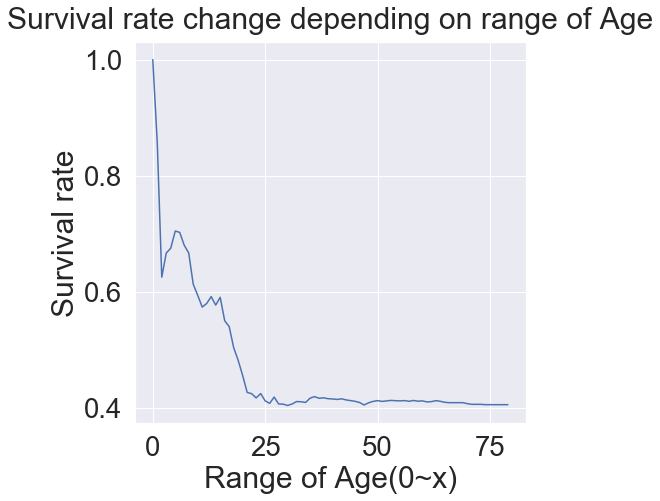

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))

plt.plot(cummulative_survive_ratio)
plt.title('Survival rate change depending on range of Age', y= 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

Age 결론
- 나이가 어릴수록 생존률이 높다

### 2.5 Pclass, Sex, Age

- 지금까지 본, Sex, Pclass, Age, Survived 모두에 대해서 보고자 한다.
- seaborn의 violinplot의 x축은 나눠서 보고자하는 case, y축은 보고자하는 dist이다.

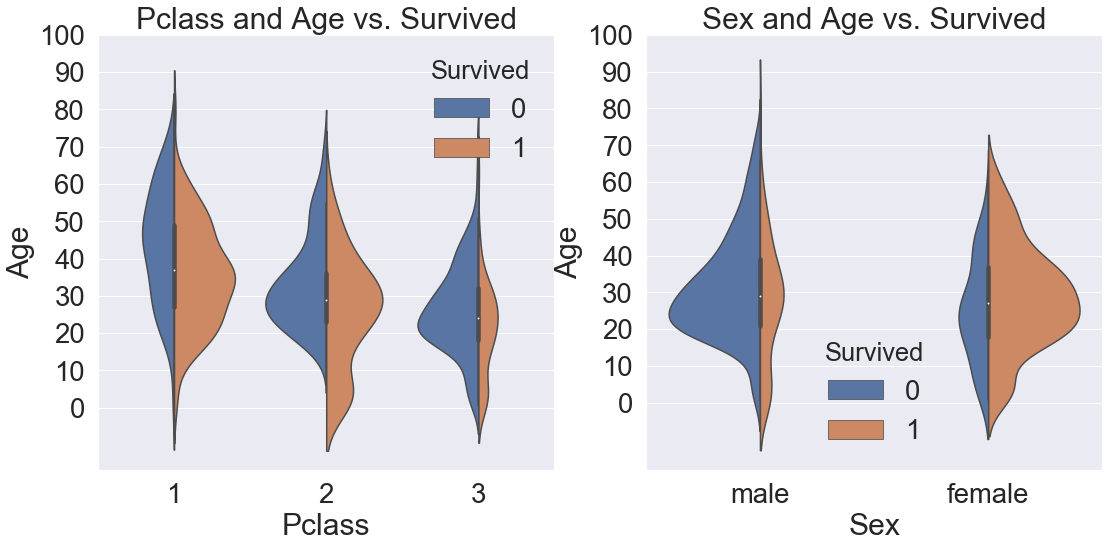

In [43]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot('Pclass','Age', hue='Survived', data=df_train,
              scale = 'count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age', hue='Survived', data = df_train,
              scale = 'count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0,110,10))


결론
- 왼쪽 그림: 모든 Pclass에서 나이가 어릴수록 생존을 많이 했다.
- 오른쪽 그림: 여자가 남자보다 생존을 많이 했다.
- 여성과 아이가 생존을 많이 한 것을 알 수 있다.

### 2.6 Embarked

- 탑승한 곳에 따른 생존률을 살펴보자

In [44]:
df_train[['Embarked', 'Survived']].groupby('Embarked', as_index=True).mean().sort_values(by='Survived')

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


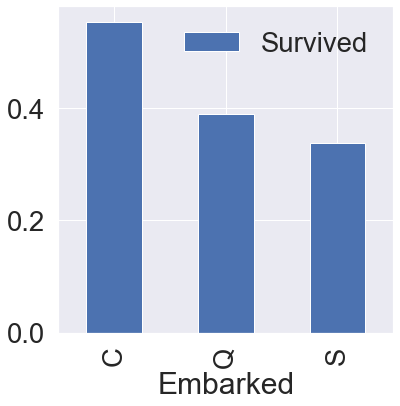

In [45]:
f,ax = plt.subplots(1,1,figsize=(6,6))
df_train[['Embarked', 'Survived']].groupby('Embarked', as_index=True).mean().plot.bar(ax=ax)

- 조금의 차이는 있지만 생존률이 비슷비슷한 듯하다. 그래도 C가 제일 높다


- 다른 feature들로 split해서 살펴보자

Text(0.5, 1.0, '(4) Embarked vs. Pclass')

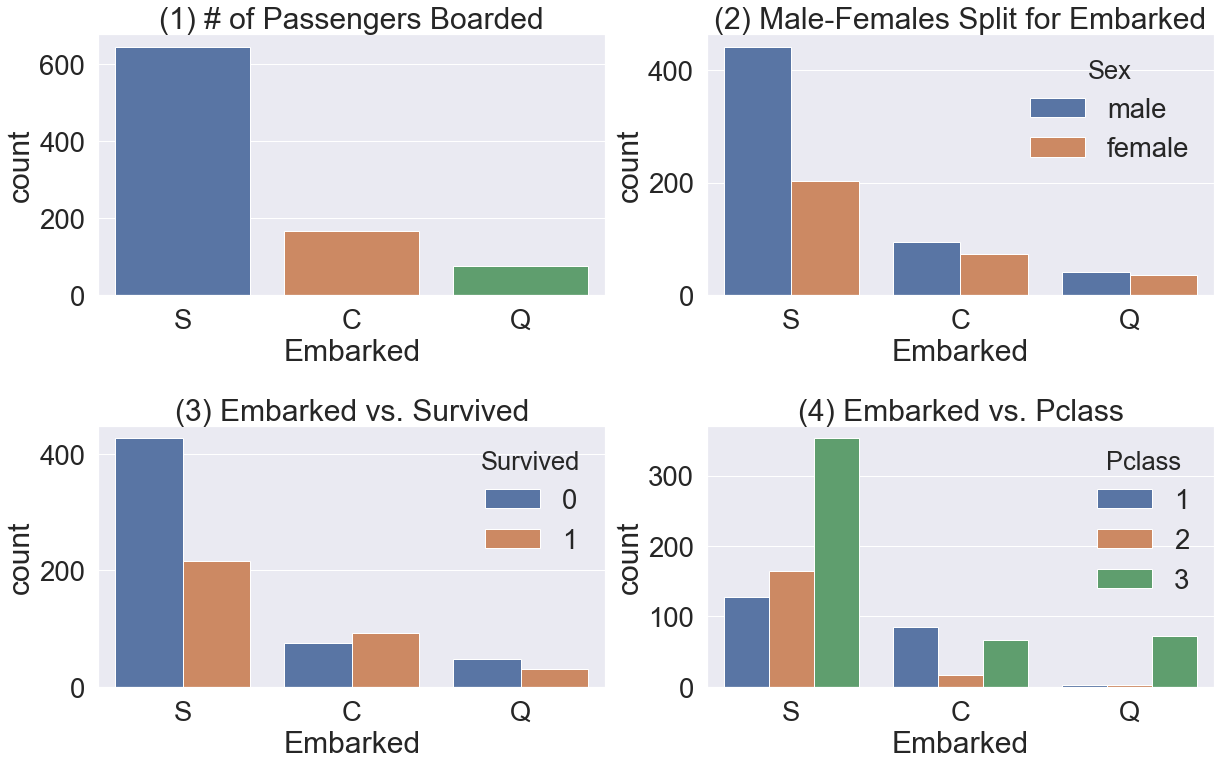

In [46]:
f, ax = plt.subplots(2,2, figsize=(20,12))

sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) # of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Females Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
ax[1,0].set_title('(3) Embarked vs. Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs. Pclass')

- Figure(1) - 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승했다.
- Figure(2) - C와 Q는 남녀 비율이 비슷하지만, S는 남자가 더 많이 탑승했다.
- Figure(3) - 생존확률이 S인 경우 특히나 낮은 걸 확인가능하다.
- Figure(4) - Pclass로 split하니, C가 생존확률이 높은 건 클래스가 높은 사람이 타서 그런 것 같다. S는 3rd class가 많고 생존확률이 낮게 나온다.

### Family - SibSp(형제,  자매) + Parch(부모, 자녀)

- SibSp와 Parch를 합치면 Family가 될 것이다.

In [47]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1  # 자신 포함
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1  # 자신 포함

In [48]:
print('Maximum size of Family: ',df_train['FamilySize'].max())
print('Minimum size of Family: ',df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


- FamilySize와 Survived의 관계를 살펴보자.

Text(0.5, 1.02, '(3) Survived rate depending on FamliySize')

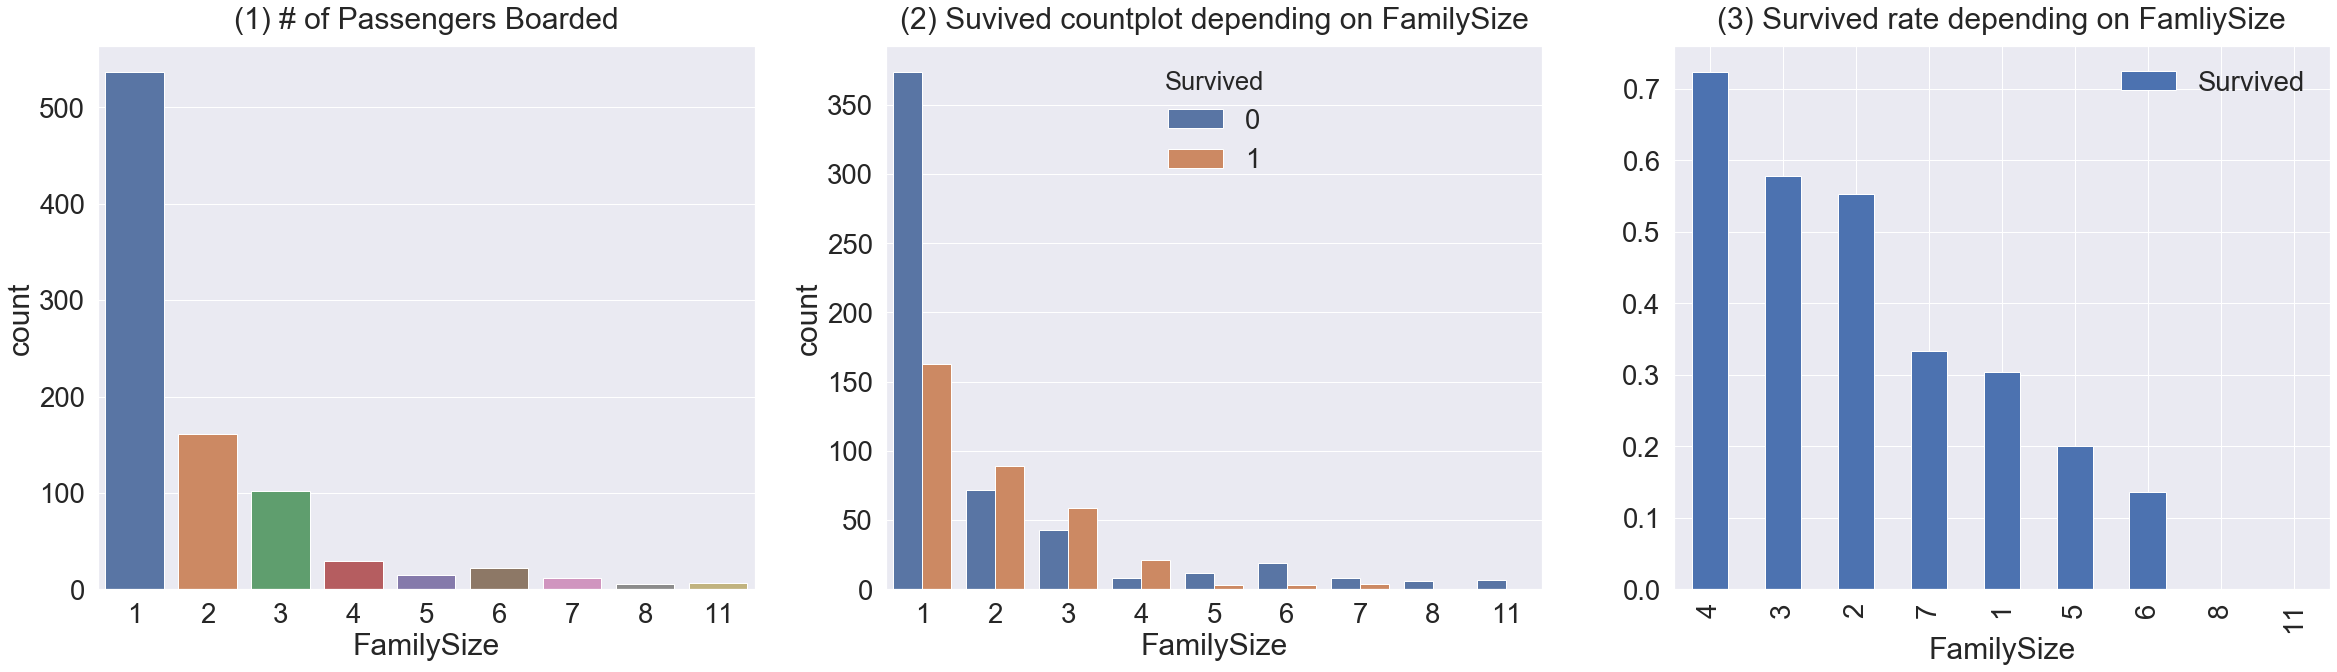

In [49]:
f, ax = plt.subplots(1,3, figsize=(40,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) # of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Suvived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize','Survived']].groupby('FamilySize', as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamliySize', y=1.02)

- Figure(1): 가족크기가 1~11까지 있음을 볼 수 있고, 대부분 1명이며 그 다음으로 2,3,4명이다.

- Figure(2): 가족크기에 따른 생존비교. 가족이 4명인 경우 생존확률이 가장 높다. 가족 수가 많아질수록 생존확률이 낮아진다. 또는 너무 적어도 생존확률이 적다. 대략 3~4명 선에서 생존확률이 높은 편이다.

### 2.8 Fare

- Fare는 탑승요금이며, continuos feature이다.

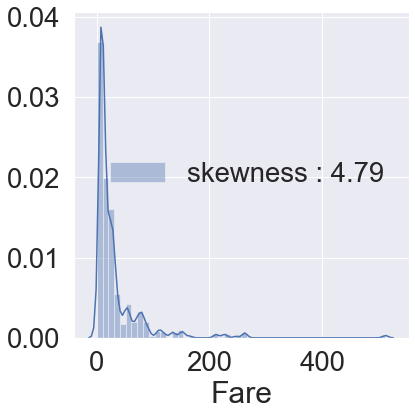

In [54]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
g = sns.distplot(df_train['Fare'], color='b', label='skewness : {0:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- 분포가 매우 비대칭적이다.(high skewness) 만약 이대로 모델에 넣는다면 모델이 잘못 학습할 확률이 높다. 몇 없는 outlier에 대해 너무 민감하게 반응한다면, 실제 예측 시에 좋지 않은 결과를 부를 수 있다.



- outlier의 영향을 줄이기 위해 --> log변환을 해준다.


- 여기서 pandas의 특징: DataFrame의 특정 column에 공통된 함수를 적용하고 싶다면, map또는 apply함수를 사용하면 손쉽게 가능하다.




- 목표: Fare column의 데이터 모두를 log취하기 --> 간단한 lambda함수로 map 또는 apply의 인수로 넣어주면, Fare column 데이터에 모두 적용이 된다.

In [57]:
# 그전에 test set에 있는 NaN을 평균값으로 대체한다.
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].apply(lambda x: np.log(x) if x>0 else 0)
df_test['Fare'] = df_test['Fare'].apply(lambda x: np.log(x) if x>0 else 0)

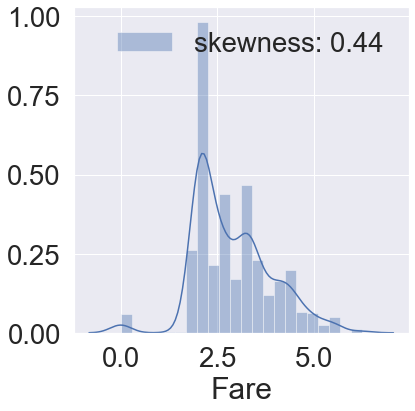

In [60]:
f, ax = plt.subplots(1,1, figsize=(6,6))

g= sns.distplot(df_train['Fare'], color='b',label='skewness: {0:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

- 로그변환 후 비대칭성이 많이 사라짐을 확인할 수 있다.


- 이처럼 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering 이라고 한다.

### 2.9 Cabin

- 이 feature는 NaN의 비율이 대략 80%로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지 않다.

- 그러므로 우리가 세우는 모델에 포함하지 않도록 한다.

In [65]:
print('Percentage of NaN of Cabin columns: {0:.2f}'.format(100*(df_train['Cabin'].isnull().sum() / len(df_train['Cabin']))))

Percentage of NaN of Cabin columns: 77.10


### 2.10 Ticket

- 이 feature 는 NaN 은 없다. 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요하다.

In [67]:
df_train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [68]:
df_train['Ticket'].value_counts()

CA. 2343        7
1601            7
347082          7
CA 2144         6
347088          6
3101295         6
382652          5
S.O.C. 14879    5
113760          4
2666            4
4133            4
PC 17757        4
19950           4
349909          4
W./C. 6608      4
LINE            4
347077          4
113781          4
17421           4
110152          3
24160           3
110413          3
239853          3
13502           3
PC 17755        3
F.C.C. 13529    3
29106           3
C.A. 31921      3
PC 17572        3
345773          3
               ..
345774          1
349228          1
2623            1
315090          1
350036          1
2690            1
350034          1
29103           1
29104           1
17465           1
349244          1
330980          1
A/5 3540        1
349225          1
7552            1
PC 17605        1
347067          1
2693            1
2689            1
113788          1
370371          1
PC 17474        1
347063          1
364498          1
2648      

- Ticket은 매우 다양한 값을 가진다. 여기서 어떤 특징을 끌어낼지 아이디어를 내는 것이 성능을 더 이끌어낼 수 이다. 우선 튜토리얼이니 Ticket변수는 넘어가기로 한다.